In [ ]:
Na samym początku należało ponownie wgrać pulpa

In [1]:
!pip install pulp

!sudo apt-get install coinor-cbc glpk-utils coinor-clp

     |████████████████████████████████| 40.6MB 104kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  coinor-libcbc3 coinor-libcgl1 coinor-libclp1 coinor-libcoinutils3v5
  coinor-libosi1v5 libamd2 libcolamd2 libglpk40 libsuitesparseconfig5
Suggested packages:
  libiodbc2-dev default-libmysqlclient-dev
The following NEW packages will be installed:
  coinor-cbc coinor-clp coinor-libcbc3 coinor-libcgl1 coinor-libclp1
  coinor-libcoinutils3v5 coinor-libosi1v5 glpk-utils libamd2 libcolamd2
  libglpk40 libsuitesparseconfig5
0 upgraded, 12 newly installed, 0 to remove and 15 not upgraded.
Need to get 3,439 kB of archives.
After this operation, 9,832 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsuitesparseconfig5 amd64 1:5.1.2-2 [9,044 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libamd2 amd64 1:5.1.2-2 [19.5 kB]
Get:3 

Celem zajeć było rozwiązanie postawionego problemu dotyczącego produkcji okien. Dana firma sprzedaje okna dwóch rodzajów tj. drewniane i aluminiowe. Okna produkowane są w 3 firmach. Naszym zadaniem jest napisanie programu, który odpowiada za maksymalizację zysku z produkcji okien. Sliderami operujemy zmienne takie jak:

-zysk z okna drewnianego

-zysk z okna aluminiowego

-czas produkcji

-ilość godzin fabryk

Zmienne decyzyjne - ilość wyprodukowanych okien każdego rodzaju

Wynikiem programu jest ilośc wyprodukowanych okien i zysk z produkcji. Zwracane jst także shadow price i slack. 

Dane:

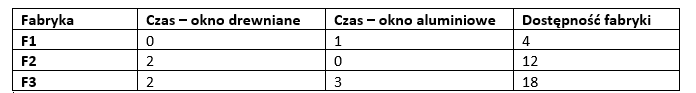

Zysk z okna aluminiowego: 3000

Zysk z okna drewnianego: 5000

In [2]:
# Libraries
from pulp import *
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, FloatSlider, IntSlider
import ipywidgets as widgets
import pandas as pd

style = {'description_width': 'initial'}

# Sliders configuration
zysk_aluminiowe_slider = IntSlider (min=0,max = 10000, value= 3000, description="zysk_aluminiowe", style = style)
zysk_drewniane_slider  = IntSlider (min=0,max = 10000, value= 5000, description="zysk_drewniane",  style = style)
f1_czas_slider        = IntSlider (min=0,max = 20,    value= 4,    description="f1_czas",        style = style)
f2_czas_slider        = IntSlider (min=0,max = 20,    value= 12,   description="f2_czas",        style = style)
f3_czas_slider        = IntSlider (min=0,max = 20,    value= 18,   description="f3_czas",        style = style)
f1_czas_na_alum_slider     = IntSlider (min=0,max = 10,    value= 1,    description="f1_czas_na_alum",     style = style )
f2_czas_na_alum_slider     = IntSlider (min=0,max = 10,    value= 0,    description="f2_czas_na_alum",     style = style )
f3_czas_na_alum_slider     = IntSlider (min=0,max = 10,    value= 3,    description="f3_czas_na_alum",     style = style )
f1_czas_na_drew_slider   = IntSlider (min=0,max = 10,    value= 0,    description="f1_czas_na_drew",   style = style )
f2_czas_na_drew_slider   = IntSlider (min=0,max = 10,    value= 2,    description="f2_czas_na_drew",   style = style )
f3_czas_na_drew_slider   = IntSlider (min=0,max = 10,    value= 2,    description="f3_czas_na_drew",   style = style )

def produckja_okien( 
    zysk_aluminiowe= 3000,
    zysk_drewniane = 5000,
    f1_czas = 4,
    f2_czas = 12,
    f3_czas = 18,
    f1_czas_na_alum = 1,
    f2_czas_na_alum = 0,
    f3_czas_na_alum = 3,
    f1_czas_na_drew = 0,
    f2_czas_na_drew = 2,
    f3_czas_na_drew = 2):

# The name and type of problem
    prob = LpProblem("Problem okien w fabrykach",LpMaximize)

# The 2 variables, amount of alum windows and wood windows
    x1 = LpVariable("Okna aluminiowe",0,None,LpInteger)       
    x2 = LpVariable("Okna drewniane",0,None,LpInteger)

# The main function for profit maximalization
    prob += zysk_aluminiowe*x1 + zysk_drewniane*x2, "Total profit from windows sales"

# Constraints resulting from requirements of time in each factory per each window
    prob += f1_czas_na_alum*x1 + f1_czas_na_drew*x2 <= f1_czas, "Fabryka 1"
    prob += f2_czas_na_alum*x1 + f2_czas_na_drew*x2 <= f2_czas, "Fabryka 2"
    prob += f3_czas_na_alum*x1 + f3_czas_na_drew*x2 <= f3_czas, "Fabryka 3"

# The solution of problem
    prob.solve()
    print("Status:", LpStatus[prob.status], "\n")

# Amount of produced windows and maximalized profit
    print("Wyprodukowano:")
    for v in prob.variables():
      print(v.name, ":", int(v.varValue))

    print("\nProfit:",value(prob.objective),"zł \n")
    
# Shadow values of problem
    shadows = [{'name':name, 'shadow price': c.pi, "slack": c.slack} for name, c in prob.constraints.items()]
    print("*"*10+"Shadow Prices"+"*"*10)
    print(pd.DataFrame(shadows), "\n")

# Sliders handlers
interact(produckja_okien,
    zysk_z_aluminiowych= zysk_aluminiowe_slider,
    zysk_z_drewnianych = zysk_drewniane_slider,
    f1_czas = f1_czas_slider,
    f2_czas = f2_czas_slider,
    f3_czas = f3_czas_slider,
    f1_czas_na_alum = f1_czas_na_alum_slider,
    f2_czas_na_alum = f2_czas_na_alum_slider,
    f3_czas_na_alum = f3_czas_na_alum_slider,
    f1_czas_na_drew = f1_czas_na_drew_slider,
    f2_czas_na_drew = f2_czas_na_drew_slider,
    f3_czas_na_drew = f3_czas_na_drew_slider)

interactive(children=(IntSlider(value=3000, description='zysk_aluminiowe', max=9000, min=-3000), IntSlider(val…

<function __main__.produckja_okien>